In [1]:
import os
import pandas as pd

def veri_seti_olustur(veri_klasoru):
    # Boş bir DataFrame oluşturun
    veri_seti = pd.DataFrame(columns=["Dosya_Yolu", "Metin"])

    # Klasörlerde dolaşarak txt dosyalarını okuyun
    for klasor, _, dosyalar in os.walk(veri_klasoru):
        for dosya in dosyalar:
            if dosya.endswith('.txt'):
                dosya_yolu = os.path.join(klasor, dosya)
                with open(dosya_yolu, 'r', encoding="utf-8") as dosya:
                    icerik = dosya.read()
                    # DataFrame'e dosya yolunu ve içeriği ekleyin
                    veri_seti = pd.concat([veri_seti, pd.DataFrame({'Dosya_Yolu': [dosya_yolu], 'Metin': [icerik]})], ignore_index=True)

    return veri_seti

def sınıf_ekle(veri_seti):

    # Dosya yollarından sınıf numarasını çıkart
    veri_seti['Sınıf'] = veri_seti['Dosya_Yolu'].apply(lambda x: os.path.basename(os.path.dirname(x)).split("BIRADS")[1][0])
    return veri_seti

# Veri setini oluşturun
veri_klasoru = r'/path/to/dataset'
veri_seti = veri_seti_olustur(veri_klasoru)

# Sınıf özelliğini ekleyin
veri_seti = sınıf_ekle(veri_seti)

veri_seti

,Dosya_Yolu,Metin,Sınıf
0,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nHer iki meme p...,2
1,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nHer iki memeni...,2
2,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nHer iki meme c...,2
3,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nHer iki memeni...,2
4,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nMeme parankimi...,2
...,...,...,...
1995,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nMeme parankim ...,5
1996,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ:\nBilateral are...,5
1997,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ İNCELEMESİ\nHer iki meme y...,5
1998,/content/drive/MyDrive/2000raporBIRADSgruplanm...,BİLATERAL MAMOGRAFİ RAPORU\nMeme dokusu patern...,5


<ipython-input-2-6ef8b1e33f85>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Bİ-RADS_"+sınıf_sayımı.index, y=sınıf_sayımı.values, palette='viridis')


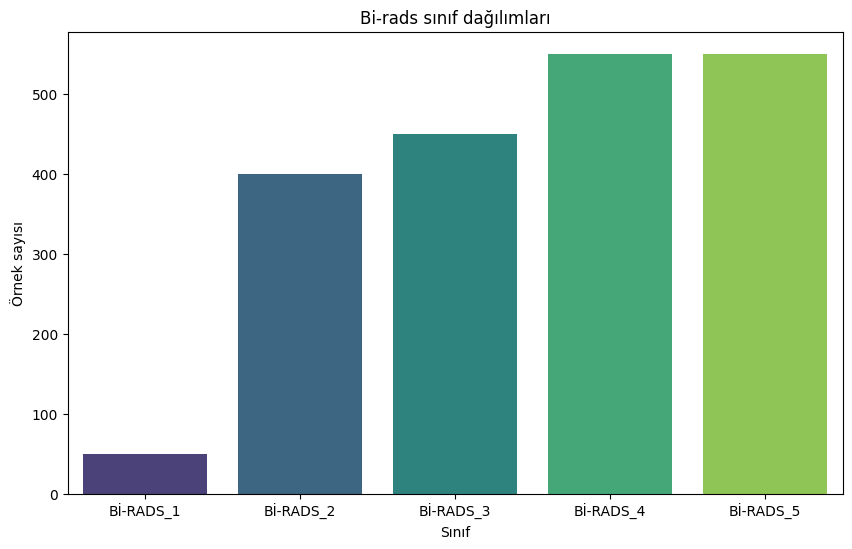

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sınıf dağılımını hesapla
sınıf_sayımı = veri_seti['Sınıf'].value_counts()

sınıf_sayımı = sınıf_sayımı.sort_values()

# Sınıf dağılımını görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x="Bİ-RADS_"+sınıf_sayımı.index, y=sınıf_sayımı.values, palette='viridis')
plt.xlabel('Sınıf')
plt.ylabel('Örnek sayısı')
plt.title('Bi-rads sınıf dağılımları')
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Önce veri setini eğitim ve geçici test+validasyon setlerine ayıralım (%80 eğitim, %20 geçici)
train_set, temp_set = train_test_split(veri_seti, test_size=0.2, stratify=veri_seti['Sınıf'], random_state=42)

# Geçici seti de test ve validasyon setlerine ayıralım (%70 test, %30 validasyon)
test_set, validation_set = train_test_split(temp_set, test_size=0.7, stratify=temp_set['Sınıf'], random_state=42)



print(train_set['Sınıf'].value_counts())
print(test_set['Sınıf'].value_counts())
print(validation_set['Sınıf'].value_counts())

Sınıf
5    440
4    440
3    360
2    320
1     40
Name: count, dtype: int64
Sınıf
5    33
4    33
3    27
2    24
1     3
Name: count, dtype: int64
Sınıf
5    77
4    77
3    63
2    56
1     7
Name: count, dtype: int64


In [4]:
def replace_rads(text, keywords):
    # Metni boşluğa göre ayır ve son 5 kelimeyi al
    metin = ' '.join(text.split()[:-5])
    words = text.split()[-5:]

    # Sayıları kaldır
    words = [word for word in words if not any(char.isdigit() for char in word)]

    # 'rads' geçen kelimeyi al
    for i in range(len(words)):
        for keyword in keywords:
            if keyword in words[i]:
                words[i] = ""

    # Güncellenmiş metni birleştir
    modified_text = ' '.join(words)

    return metin + ' ' + modified_text

veri_seti.Metin = veri_seti.Metin.str.lower()

# "rads", "sonu", "tahlil" veya "katego" kelimelerinden herhangi biri içeren ikinci kelimeye göre "rads" kelimesini boş bir dizeyle değiştir
keywords = ['rads' ,'sonu', 'tahlil', 'katego']
veri_seti.Metin = veri_seti.Metin.apply(replace_rads, keywords = keywords)
veri_seti

,Dosya_Yolu,Metin,Sınıf
0,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ her iki mem...,2
1,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ her iki mem...,2
2,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ her iki mem...,2
3,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ her iki mem...,2
4,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ meme parank...,2
...,...,...,...
1995,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ meme parank...,5
1996,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇: bilateral ...,5
1997,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ i̇ncelemesi̇ her iki mem...,5
1998,/content/drive/MyDrive/2000raporBIRADSgruplanm...,bi̇lateral mamografi̇ raporu meme dokusu pater...,5


In [5]:
mask = veri_seti['Metin'].str.split().str[0].str.lower().str.contains("teral") & \
       veri_seti['Metin'].str.split().str[1].str.lower().str.contains("ograf") & \
       veri_seti['Metin'].str.split().str[2].str.lower().str.contains("nceleme")

veri_seti.loc[mask, 'Metin'] = veri_seti[mask]['Metin'].str.split(n=3).str[-1]

In [6]:
data = veri_seti.copy()

# Metin ön işleme

In [10]:
!pip install JPype1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 24.4 MB/s eta 0:00:00


In [8]:
import jpype as jp
import re
import string
from jpype import JClass, getDefaultJVMPath, startJVM, JString

# JVM başlatma
ZEMBEREK_PATH = r'/path/to/zemberek-full.jar'
if not jp.isJVMStarted():
    startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))

# Zemberek bileşenlerini tanımla
TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
TurkishSentenceNormalizer = JClass('zemberek.normalization.TurkishSentenceNormalizer')
TurkishTokenizer = JClass("zemberek.tokenization.TurkishTokenizer")
TurkishSpellChecker = JClass('zemberek.normalization.TurkishSpellChecker')
Paths = JClass('java.nio.file.Paths')

# Normalizasyon için dosya yolları
lookupRoot = Paths.get('/path/to/normalization')
lmPath = Paths.get('/path/to/lm.2gram.slm')
morphology = TurkishMorphology.createWithDefaults()
normalizer = TurkishSentenceNormalizer(morphology, lookupRoot, lmPath)
tokenizer = TurkishTokenizer.DEFAULT
spell_checker = TurkishSpellChecker(morphology)

# Ön işleme fonksiyonu
def preprocess_text(text):
    # 1. Küçük harfe çevirme
    text = text.lower()

    # 2. Sayıları kaldırma
    text = re.sub(r'\d+', '', text)

    # 3. Noktalama işaretlerini kaldırma
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Yazım denetimi ve düzeltme
    words = text.split()
    corrected_words = []
    for word in words:
        if not spell_checker.check(JString(word)):
            suggestions = spell_checker.suggestForWord(JString(word))
            corrected_word = str(suggestions[0]) if suggestions.size() > 0 else word
        else:
            corrected_word = word
        corrected_words.append(corrected_word)

    corrected_text = " ".join(corrected_words)

    # 5. Normalizasyon
    normalized_text = normalizer.normalize(JString(corrected_text))

    # 6. Tokenizasyon (kelime bazlı ayırma)
    tokenized_words = [
        str(token.content) for token in tokenizer.tokenize(JString(normalized_text))
    ]

    return tokenized_words  # Liste olarak döndür


# DataFrame üzerinde uygulama
data['İşlenmiş_Metin'] = data['Metin'].apply(preprocess_text)

# Çıktıyı kontrol etme
print(data.head())



                                          Dosya_Yolu  \
0  /content/drive/MyDrive/2000raporBIRADSgruplanm...   
1  /content/drive/MyDrive/2000raporBIRADSgruplanm...   
2  /content/drive/MyDrive/2000raporBIRADSgruplanm...   
3  /content/drive/MyDrive/2000raporBIRADSgruplanm...   
4  /content/drive/MyDrive/2000raporBIRADSgruplanm...   

                                               Metin Sınıf  \
0  her iki meme parankimi tip d paternde yogun de...     2   
1  her iki memenin kraniokaudal ve mediolateral o...     2   
2  her iki meme cilt-cilt altı yapılar tabiidir. ...     2   
3  her iki memenin kraniokaudal ve mediolateral o...     2   
4  meme parankimi tip b patern ile uyumludur. her...     2   

                                      İşlenmiş_Metin  
0  [her, iki, meme, parankima, tip, de, patende, ...  
1  [her, iki, memenin, kranıokaudal, ve, mediolat...  
2  [her, iki, meme, ciltçili, altı, yapılar, tabi...  
3  [her, iki, memenin, kranıokaudal, ve, mediolat...  
4  [meme, paran

In [9]:
data = data[["İşlenmiş_Metin","Sınıf"]]

data

,İşlenmiş_Metin,Sınıf
0,"[her, iki, meme, parankima, tip, de, patende, ...",2
1,"[her, iki, memenin, kranıokaudal, ve, mediolat...",2
2,"[her, iki, meme, ciltçili, altı, yapılar, tabi...",2
3,"[her, iki, memenin, kranıokaudal, ve, mediolat...",2
4,"[meme, parankima, tıp, bu, paten, ile, uyumlud...",2
...,...,...
1995,"[meme, parankima, pateni, acı, birds, sınıflam...",5
1996,"[bilateral, arzola, ciltçili, altı, görünüm, t...",5
1997,"[her, iki, meme, yağ, dokusu, açısından, tıp, ...",5
1998,"[bi̇lateral, mamografi, raporu, meme, dokusu, ...",5


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Assuming 'data' is a dictionary with 'processed_text' as the key
# Flatten the list of words for CountVectorizer
all_words = [word for sublist in data['İşlenmiş_Metin'] for word in sublist]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
X_train = vectorizer.fit_transform([' '.join(sublist) for sublist in data['İşlenmiş_Metin']])

# Convert the result to a DataFrame for better readability
vectorized_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())

# Save the trained vectorizer
joblib_file = "vectorizer.pkl"
joblib.dump(vectorizer, joblib_file)

# Now vectorized_df contains the vectorized training data and the vectorizer is saved
vectorized_df

,acele,acil,acrtip,acı,adac,adada,adenopatısı,adet,adıpomasti,aerolanıpple,...,şekillenmeyen,şekilli,şeklinde,şeklini,şu,şuboptimaldir,şüphe,şüpheli,şüphenin,şüphesi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split


X = vectorized_df
y = data[["Sınıf"]].astype(int)

y["Sınıf"] = y["Sınıf"]-1
# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sonuçları gösterme
print("Eğitim Seti X boyutu:", X_train.shape)
print("Eğitim Seti y boyutu:", y_train.shape)
print("Test Seti X boyutu:", X_test.shape)
print("Test Seti y boyutu:", y_test.shape)


Eğitim Seti X boyutu: (1600, 2031)
Eğitim Seti y boyutu: (1600, 1)
Test Seti X boyutu: (400, 2031)
Test Seti y boyutu: (400, 1)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score


# RandomForestClassifier modelini oluşturma
clf = RandomForestClassifier(random_state=42)

# Modeli eğitme
clf.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = clf.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Test Seti Doğruluk Oranı:", f1)
print("\nSınıflandırma Raporu:\n", report)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Seti Doğruluk Oranı: 0.9295351174338031

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.92      0.86      0.89        83
           2       0.90      0.98      0.94        89
           3       0.92      1.00      0.96        94
           4       0.98      0.96      0.97       125

    accuracy                           0.94       400
   macro avg       0.94      0.80      0.82       400
weighted avg       0.94      0.94      0.93       400



In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# LGBM modelini oluşturma
lgb_model = lgb.LGBMClassifier(random_state=42)

# Modeli eğitme
lgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = lgb_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred )

print("Test Seti Doğruluk Oranı:", f1)
print("\nSınıflandırma Raporu:\n", report)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1281
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 442
[LightGBM] [Info] Start training from score -3.664187
[LightGBM] [Info] Start training from score -1.618857
[LightGBM] [Info] Start training from score -1.488881
[LightGBM] [Info] Start training from score -1.255266
[LightGBM] [Info] Start training from score -1.325670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score

# AdaBoost modelini oluşturma
ada_model = GradientBoostingClassifier(random_state=42, n_estimators=200)

# Modeli eğitme
ada_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = ada_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Seti F1 Skoru: 0.924900811144901

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.94      0.81      0.87        83
           2       0.88      0.98      0.93        89
           3       0.93      1.00      0.96        94
           4       0.98      0.93      0.95       125

    accuracy                           0.93       400
   macro avg       0.86      0.88      0.86       400
weighted avg       0.93      0.93      0.92       400



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# XGBoost modelini oluşturma
xgb_model = xgb.XGBClassifier(random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = xgb_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred )

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)


Test Seti F1 Skoru: 0.9449943395124392

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.97      0.87      0.92        83
           2       0.94      0.98      0.96        89
           3       0.92      1.00      0.96        94
           4       0.98      0.95      0.97       125

    accuracy                           0.94       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.95      0.94      0.94       400



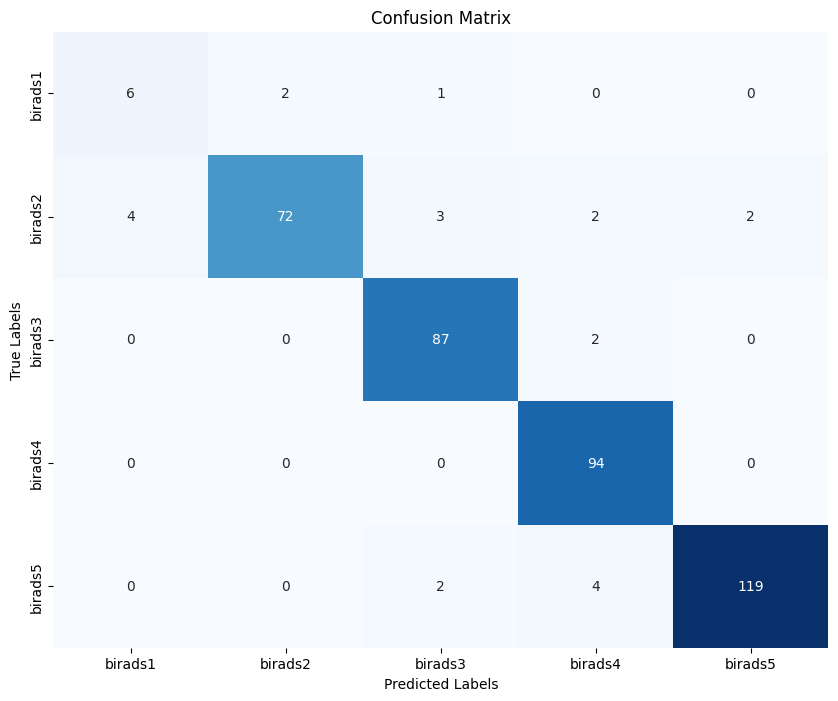

Test Seti Weighted F1 Score: 0.9449943395124392

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.97      0.87      0.92        83
           2       0.94      0.98      0.96        89
           3       0.92      1.00      0.96        94
           4       0.98      0.95      0.97       125

    accuracy                           0.94       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.95      0.94      0.94       400



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have already trained your XGBoost model and obtained predictions
# X_train, X_test, y_train, y_test are assumed to be defined and prepared

# XGBoost modelini oluşturma
xgb_model = xgb.XGBClassifier(random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = xgb_model.predict(X_test)

# F1 score hesaplama
f1 = f1_score(y_test, y_pred, average='weighted')

# Sınıflandırma raporu oluşturma
report = classification_report(y_test, y_pred)

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)

# Class names corresponding to confusion matrix labels
class_names = [f"birads{cls+1}" for cls in np.unique(y_test)]

# Confusion matrix'i görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Sonuçları yazdırma
print("Test Seti Weighted F1 Score:", f1)
print("\nSınıflandırma Raporu:\n", report)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score

# MLPClassifier modelini oluşturma
mlp_model = MLPClassifier(random_state=42, max_iter=300)

# Modeli eğitme
mlp_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = mlp_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred )

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Seti F1 Skoru: 0.9516857781535158

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.99      0.86      0.92        83
           2       0.92      0.98      0.95        89
           3       0.93      1.00      0.96        94
           4       0.99      0.98      0.99       125

    accuracy                           0.95       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from autogluon.tabular import TabularPredictor


# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test verilerini DataFrame formatına dönüştürme
train_data = pd.DataFrame(X_train)
train_data['Sınıf'] = y_train

test_data = pd.DataFrame(X_test)
test_data['Sınıf'] = y_test

# TabularPredictor kullanarak model eğitimi
predictor = TabularPredictor(label="Sınıf", eval_metric='f1_weighted', verbosity=2).fit(train_data, presets='best_quality')

# Test verileri üzerinde tahmin yapma
predictions = predictor.predict(test_data)

# F1 skorunu hesaplama
f1 = f1_score(test_data['Sınıf'], predictions, average='weighted')

# Sonuçları yazdırma
print(f"F1 Skoru: {f1}")

# Tüm modellerin detaylarını içeren leaderboard'u yazdırma
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard)



No path specified. Models will be saved in: "AutogluonModels/ag-20241128_215035"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.44 GB / 12.67 GB (74.5%)
Disk Space Avail:   78.98 GB / 112.64 GB (70.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

F1 Skoru: 0.9669916495066204
                      model  score_val  eval_metric  pred_time_val  \
0       WeightedEnsemble_L2   0.962969  f1_weighted       4.918319   
1     NeuralNetTorch_BAG_L1   0.956485  f1_weighted       2.758283   
2           LightGBM_BAG_L1   0.955350  f1_weighted       0.435676   
3         LightGBMXT_BAG_L1   0.949841  f1_weighted       0.774920   
4      LightGBMLarge_BAG_L1   0.948840  f1_weighted       0.617020   
5            XGBoost_BAG_L1   0.946610  f1_weighted       0.425624   
6           CatBoost_BAG_L1   0.939494  f1_weighted       1.578996   
7   RandomForestGini_BAG_L1   0.930954  f1_weighted       0.618807   
8     ExtraTreesEntr_BAG_L1   0.930779  f1_weighted       0.560677   
9   RandomForestEntr_BAG_L1   0.930743  f1_weighted       0.674987   
10    ExtraTreesGini_BAG_L1   0.928427  f1_weighted       0.588295   
11   NeuralNetFastAI_BAG_L1   0.916231  f1_weighted       0.379594   
12    KNeighborsDist_BAG_L1   0.860397  f1_weighted       0.1

In [ ]:

# Modeli değerlendirme
f1 = f1_score(y_test, predictions.values
, average='weighted')
report = classification_report(y_test, predictions.values )

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)



Test Seti F1 Skoru: 0.9669916495066204

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.97      0.92      0.94        83
           2       0.95      0.99      0.97        89
           3       0.97      1.00      0.98        94
           4       0.99      0.98      0.99       125

    accuracy                           0.97       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.97      0.97      0.97       400



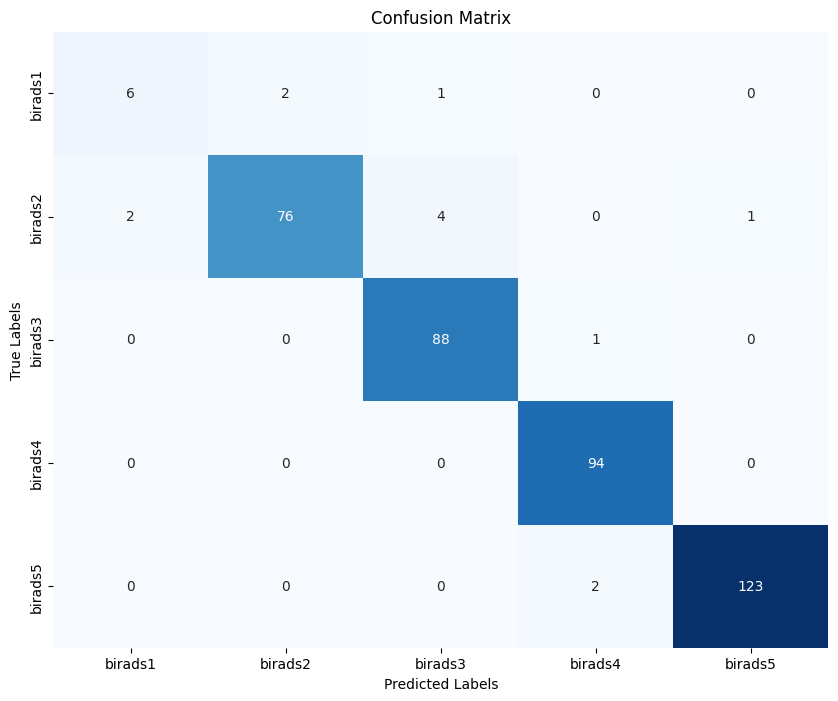

Test Seti Weighted F1 Score: 0.9669916495066204

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.97      0.92      0.94        83
           2       0.95      0.99      0.97        89
           3       0.97      1.00      0.98        94
           4       0.99      0.98      0.99       125

    accuracy                           0.97       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.97      0.97      0.97       400



'Test Seti Weighted F1 Score: 0.972508816943207\n\nSınıflandırma Raporu:\n               precision    recall  f1-score   support\n\n           0       0.75      0.86      0.80         7\n           1       0.97      0.92      0.95        85\n           2       0.97      1.00      0.98        89\n           3       0.97      0.99      0.98        94\n           4       0.99      0.98      0.99       125\n\n    accuracy                           0.97       400\n   macro avg       0.93      0.95      0.94       400\nweighted avg       0.97      0.97      0.97       400\n'

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have already trained your XGBoost model and obtained predictions
# X_train, X_test, y_train, y_test are assumed to be defined and prepared


# F1 score hesaplama
f1 = f1_score(y_test, predictions.values, average='weighted')

# Sınıflandırma raporu oluşturma
report = classification_report(y_test, predictions.values)

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, predictions.values)

# Class names corresponding to confusion matrix labels
class_names = [f"birads{cls+1}" for cls in np.unique(y_test)]

# Confusion matrix'i görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Sonuçları yazdırma
print("Test Seti Weighted F1 Score:", f1)
print("\nSınıflandırma Raporu:\n", report)

"""Test Seti Weighted F1 Score: 0.972508816943207

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.97      0.92      0.95        85
           2       0.97      1.00      0.98        89
           3       0.97      0.99      0.98        94
           4       0.99      0.98      0.99       125

    accuracy                           0.97       400
   macro avg       0.93      0.95      0.94       400
weighted avg       0.97      0.97      0.97       400
"""

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

# SVC modelini oluşturma
svc_model = SVC(random_state=42)

# Modeli eğitme
svc_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = svc_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Seti F1 Skoru: 0.8923329489743342

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      0.84      0.83        83
           2       0.89      0.94      0.92        89
           3       0.92      0.93      0.92        94
           4       0.95      0.96      0.96       125

    accuracy                           0.90       400
   macro avg       0.72      0.73      0.73       400
weighted avg       0.88      0.90      0.89       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score

# Naive Bayes modelini oluşturma
nb_model = MultinomialNB()

# Modeli eğitme
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = nb_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)


Test Seti F1 Skoru: 0.8143024402483525

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.72      0.82      0.77        83
           2       0.86      0.79      0.82        89
           3       0.84      0.79      0.81        94
           4       0.85      0.92      0.88       125

    accuracy                           0.82       400
   macro avg       0.76      0.68      0.69       400
weighted avg       0.82      0.82      0.81       400



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from torch.utils.data import Dataset, DataLoader

# 1. Verileri Hazırlama
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 2. Tokenizer ve Model Ayarları
MODEL_NAME = "dbmdz/bert-base-turkish-cased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=6)

# 3. Eğitim ve Test Verilerini Hazırlama
# Sınıf etiketlerini sayısal forma dönüştür
label_encoder = LabelEncoder()
veri_seti['Encoded_Sınıf'] = label_encoder.fit_transform(veri_seti['Sınıf'])

# Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(
    veri_seti['Metin'],
    veri_seti['Encoded_Sınıf'],
    test_size=0.2,
    random_state=42
)

# Verisetlerini oluştur
train_dataset = TextDataset(X_train.tolist(), y_train.tolist(), tokenizer, max_len=128)
test_dataset = TextDataset(X_test.tolist(), y_test.tolist(), tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 4. Model Eğitimi için Ayarlar
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='steps',  # Değerlendirme stratejisini adımlara göre yap
    save_strategy='steps',        # Model kaydetme stratejisi
    save_steps=500,               # Her 500 adımda bir modeli kaydet
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    eval_steps=500  # Bu parametre 'evaluation_steps' yerine 'eval_steps' olmalı
)

# 5. F1 Skorunu Hesaplayan Fonksiyon
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    return {
        'f1': f1,
        'report': classification_report(labels, preds, output_dict=True)
    }

# 6. Modeli Eğitme
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Eğitimi başlat
trainer.train()

# 7. Modeli Değerlendirme
results = trainer.evaluate()
print("F1 Skoru:", results['eval_f1'])

# 8. Modelin Çıkışlarını Orijinal Etiketlere Çevirme (Opsiyonel)
# Örneğin tahmin edilen sınıfları orijinal etiketlere dönüştürmek için:
predictions = trainer.predict(test_dataset).predictions.argmax(-1)
predicted_labels = label_encoder.inverse_transform(predictions)
print("Tahmin Edilen Sınıflar:", predicted_labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Trainer is attempting to log a value of "{'0': {'

F1 Skoru: 0.8451122437948849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tahmin Edilen Sınıflar: ['5' '2' '4' '4' '4' '4' '4' '5' '2' '4' '2' '4' '4' '3' '2' '2' '3' '2'
 '5' '5' '2' '5' '5' '4' '5' '3' '4' '4' '4' '2' '5' '4' '3' '4' '4' '3'
 '5' '4' '4' '2' '2' '5' '2' '3' '5' '3' '3' '3' '2' '5' '5' '2' '5' '2'
 '4' '5' '4' '5' '4' '2' '5' '3' '5' '4' '5' '5' '4' '5' '2' '5' '5' '2'
 '4' '4' '3' '2' '5' '3' '2' '5' '2' '3' '5' '5' '5' '5' '5' '3' '3' '5'
 '5' '5' '2' '2' '5' '5' '3' '4' '5' '5' '4' '4' '2' '4' '3' '3' '3' '2'
 '3' '3' '3' '5' '4' '5' '3' '2' '4' '4' '2' '5' '4' '4' '4' '5' '2' '4'
 '3' '3' '4' '3' '5' '5' '3' '2' '2' '4' '5' '5' '5' '5' '4' '2' '5' '3'
 '5' '2' '3' '3' '2' '2' '5' '4' '3' '4' '2' '2' '3' '5' '3' '5' '3' '3'
 '4' '4' '5' '5' '5' '4' '2' '5' '5' '3' '5' '5' '2' '4' '3' '4' '3' '5'
 '4' '3' '5' '4' '3' '3' '5' '4' '4' '4' '3' '2' '4' '2' '5' '3' '4' '3'
 '3' '5' '5' '3' '4' '3' '2' '2' '5' '4' '4' '2' '5' '2' '2' '3' '3' '5'
 '4' '5' '3' '4' '2' '4' '5' '4' '5' '5' '2' '2' '5' '2' '5' '3' '5' '5'
 '5' '2' '4' '3' '4' '4' '3

In [16]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort

In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Eğitim ve test verisini yükleme
train_data = train_set
test_data = test_set

label_column = 'Sınıf'  # Tahmin edilecek hedef sütunu (doğru sütunu seçtiğinizden emin olun)

# AutoGluon modelini eğitme
predictor = TabularPredictor(label=label_column, eval_metric='f1_weighted').fit(train_data)

# Test verisi üzerinde leaderboard oluşturma
leaderboard = predictor.leaderboard(test_data)

# WeightedEnsemble_L2 modeliyle tahmin yapma
y_test = test_data[label_column]  # Gerçek etiketler
X_test = test_data.drop(columns=[label_column])  # Özellikler
y_pred = predictor.predict(X_test, model='WeightedEnsemble_L2')  # WeightedEnsemble_L2 tahminleri

# Weighted F1 skoru hesaplama
f1 = f1_score(y_test, y_pred, average='weighted')

# Sınıflandırma raporu oluşturma
report = classification_report(y_test, y_pred)

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)

# Sınıf isimlerini belirleme
class_names = [f"class {cls}" for cls in np.unique(y_test)]

# Confusion matrix'i görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Sonuçları yazdırma
print("Test Seti Weighted F1 Score:", f1)
print("\nSınıflandırma Raporu:\n", report)


No path specified. Models will be saved in: "AutogluonModels/ag-20241215_105616"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.47 GB / 12.67 GB (66.8%)
Disk Space Avail:   78.96 GB / 112.64 GB (70.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE kullanarak veri artırma
smote = SMOTE(random_state=42)
X_train_augmented, y_train_augmented = smote.fit_resample(X_train, y_train)

# MLPClassifier modelini oluşturma
mlp_model = MLPClassifier(random_state=42, max_iter=300)

# Modeli eğitme (SMOTE ile artırılmış veri kullanarak)
mlp_model.fit(X_train_augmented, y_train_augmented)

# Test seti üzerinde tahmin yapma
y_pred = mlp_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("Test Seti F1 Skoru:", f1)
print("\nSınıflandırma Raporu:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Seti F1 Skoru: 0.930589567379617

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.87      0.85      0.86        80
           2       0.91      0.98      0.94        90
           3       0.97      0.95      0.96       110
           4       0.98      0.98      0.98       110

    accuracy                           0.93       400
   macro avg       0.86      0.83      0.84       400
weighted avg       0.93      0.93      0.93       400



In [34]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_augmented, y_train_augmented = smote.fit_resample(X_train, y_train)

# LGBM modelini oluşturma
lgb_model = lgb.LGBMClassifier(random_state=42)

# Modeli eğitme
lgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = lgb_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred )

print("Test Seti Doğruluk Oranı:", f1)
print("\nSınıflandırma Raporu:\n", report)




Test Seti Doğruluk Oranı: 0.9570835637202499

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.99      0.84      0.91        80
           2       0.94      1.00      0.97        90
           3       0.97      1.00      0.99       110
           4       0.97      0.98      0.98       110

    accuracy                           0.96       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.96      0.96      0.96       400



In [38]:


import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_augmented, y_train_augmented = smote.fit_resample(X_train, y_train)

# LGBM modelini oluşturma
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Modeli eğitme
lgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = lgb_model.predict(X_test)

# Modeli değerlendirme
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred )

print("Test Seti Doğruluk Oranı:", f1)
print("\nSınıflandırma Raporu:\n", report)





Test Seti Doğruluk Oranı: 0.9624778925196431

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.97      0.86      0.91        80
           2       0.96      1.00      0.98        90
           3       0.98      1.00      0.99       110
           4       0.97      0.97      0.97       110

    accuracy                           0.96       400
   macro avg       0.92      0.95      0.93       400
weighted avg       0.96      0.96      0.96       400



               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.97      0.92      0.94        83
           2       0.95      0.99      0.97        89
           3       0.97      1.00      0.98        94
           4       0.99      0.98      0.99       125

    accuracy                           0.97       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.97      0.97      0.97       400